### DATA PREP 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from matplotlib.dates import DateFormatter
import warnings
warnings. filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (9,6)

In [2]:
df = pd.read_csv('original_backed_stations.csv')
df2 = pd.read_csv('muringato-sensor6.csv')
df['time'] = df2['time'].values
df[['time']] = df[['time']].apply(pd.to_datetime,dayfirst=True)
x= df[df.columns[0:9]].to_numpy()
y = df[df.columns[8]].to_numpy()
x.shape , y.shape

((294, 9), (294,))

In [6]:
data_size = int(x.shape[0] * .8)
x_train, y_train = x[:data_size], y[:data_size] 
x_test, y_test = x[data_size:], y[data_size:]

### Multivariate Linear regression

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [8]:
theta = model.coef_
theta

array([-2.78048701e-16,  6.66133815e-16, -1.94289029e-16,  1.24900090e-16,
        2.77555756e-17, -2.77555756e-17, -2.77555756e-17, -2.22044605e-16,
        1.00000000e+00])

In [9]:
intercept = model.intercept_
intercept

-8.326672684688674e-17

In [10]:
y_pred = model.predict(x_test)

In [11]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.000


### Output plot 

In [12]:
#dates = df.time[:y_test.shape[0]]
df3 = df2.tail(y_test.shape[0])
df4 = df3.drop(['Data'], axis = 1)
df4['y_test'] = y_test.tolist()
df4['y_pred'] = y_pred.tolist()
df4[['time']] = df4[['time']].apply(pd.to_datetime,dayfirst=True)

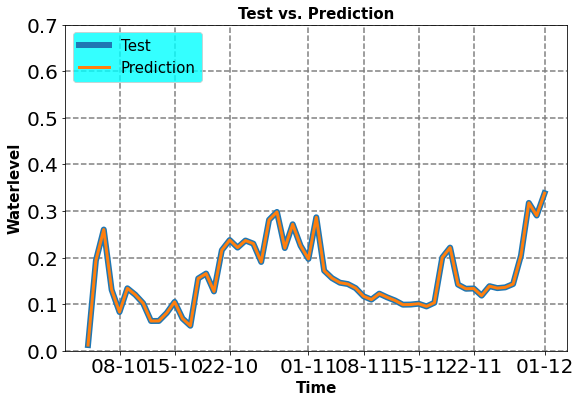

In [14]:
#Plot the output
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
Test, = plt.plot(df4['time'],y_test,linewidth=6, label='label1')
Prediction, = plt.plot(df4['time'], y_pred, linewidth=3, label='label1')
ax.grid(color = 'gray', linestyle = '--', linewidth = 1.5)
ax.set_title('Test vs. Prediction',fontsize=15,weight = 'bold')
ax.set_xlabel('Time',fontsize=15,weight = 'bold')
ax.set_ylabel('Waterlevel',fontsize=15, weight = 'bold')
ax.set_ylim(0,0.7)
ax.tick_params(axis='both',labelsize=20)
ax.tick_params(axis = 'x', labelsize = 20)
ax.grid(True)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.legend(["Test", "Prediction"], loc ="upper left", fancybox=True,facecolor='#01FFFF',prop={'size': 15,  'style': 'normal'})
ax.set(facecolor = "white")
plt.savefig('rain+water_water.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()